Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1/100


c:\Users\punna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.9054 - loss: 0.1867 - val_accuracy: 0.9991 - val_loss: 0.0058
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9991 - loss: 0.0054 - val_accuracy: 0.9993 - val_loss: 0.0034
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9992 - loss: 0.0047 - val_accuracy: 0.9993 - val_loss: 0.0034
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9991 - loss: 0.0049 - val_accuracy: 0.9993 - val_loss: 0.0033
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9993 - loss: 0.0041 - val_accuracy: 0.9993 - val_loss: 0.0031
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9994 - loss: 0.0036 - val_accuracy: 0.9993 - val_loss: 0.0031
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9992 - val_loss: 0.0031
Epoch 8/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy

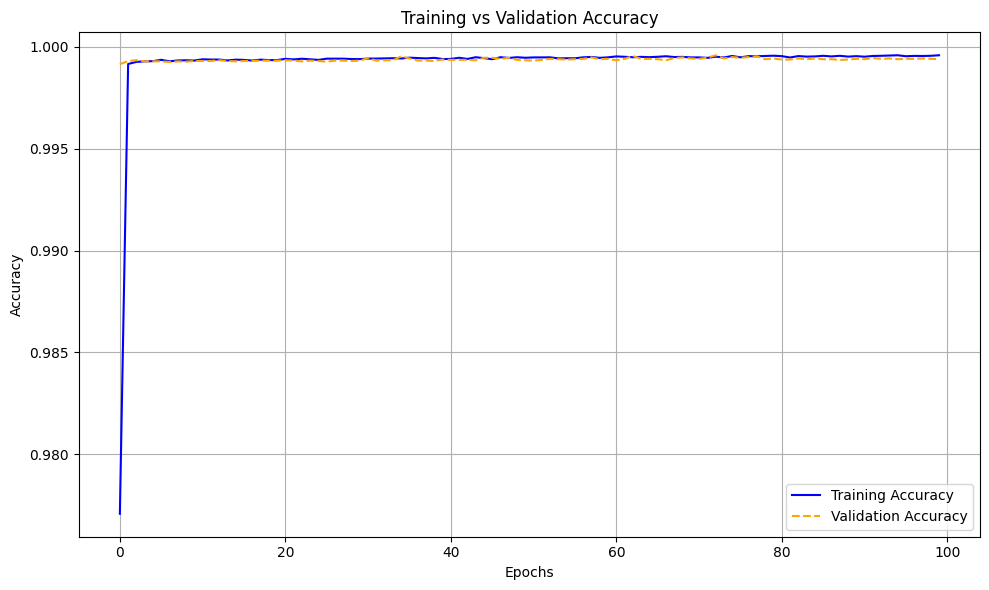


Final Training Accuracy: 0.9996
Final Validation Accuracy: 0.9994


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
df = pd.read_csv('creditcard.csv')  # Replace with your dataset path

# Prepare features and labels
X = df.drop('Class', axis=1).values
y = df['Class'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape to 3D for Conv1D input (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Define 14-layer CNN architecture
model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.2),

    Conv1D(64, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Flatten(),

    Dense(100, activation='relu'),
    Dropout(0.5),

    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model for 100 epochs
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=2048,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)


import matplotlib.pyplot as plt

# Plot Training vs Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Final accuracy values
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")



In [ ]:
import matplotlib.pyplot as plt

# Plot Training vs Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()